In [60]:
# Homework 6 Template
# G. Besla & R. Li

In [61]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

In [62]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy: string
            the name of the galaxy, e.g. “MW”
        start: integer
            the number of the first snapshot to be read in.
        end: integer
            the number of the last snapshot to be read in.
        n: integer
            the number indicating the intervals over which the COM will be returned.
            
    outputs: 
    """
    
    # compose the filename for output
    fileout = "Orbit_" + str(galaxy) + ".txt"
    
    # set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy == "M33":
        volDec = 4
    else:
        volDec = 2
        
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end, n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([np.size(snap_ids), 7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        # compose the data filename (be careful about the folder)
        ilbl = "000" + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        filename = 'D:/Academics/2022-2023/Spring 2023 - ASTR 400B (Gurtina Besla)/VLowRes/' + \
                    str(galaxy) + '_' + ilbl + ".txt"
        
        # Initialize an instance of CenterOfMass class, using disk particles
        galaxyCOM = CenterOfMass(filename, 2)

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        p_COM = galaxyCOM.COM_P(delta, volDec)
        v_COM = galaxyCOM.COM_V(p_COM[0], p_COM[1], p_COM[2])
        
        # store the time, pos, vel in ith element of the orbit array, without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = tuple([snap_id, p_COM[0]/u.kpc, p_COM[1]/u.kpc, p_COM[2]/u.kpc, v_COM[0]/(u.kilometer/u.second), \
                          v_COM[1]/(u.kilometer/u.second), v_COM[2]/(u.kilometer/u.second)])
        # print snap_id to see the progress
        # print(snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [75]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 

OrbitCOM("MW", 0, 800, 5) # tip: change 800 to 100 to see the results more quickly
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)

In [76]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

dataMW = np.genfromtxt('Orbit_MW.txt')
dataM31 = np.genfromtxt('Orbit_M31.txt')
dataM33 = np.genfromtxt('Orbit_M33.txt')

In [77]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

def VectorMagnitude(vec1, vec2):
    """This function computes the magnitude of the difference between two vectors.
    Inputs:
        vec1: NumPy array
            the first vector, given in its x, y, and z coordinates
        vec2: NumPy array
            the second vector, given in its x, y, and z coordinates
    
    Output:
        magdiff: scalar quantity
            the magnitude of the difference between vec1 and vec2
    """
    
    return np.sqrt(np.sum((vec1 - vec2)**2))

In [78]:
how_many_snapshots = int(np.size(dataMW) / 7) # 7 is the number of columns

# Determine the magnitude of the relative position and velocities 

# of MW and M31
mag_pos_MW_M31 = np.zeros(how_many_snapshots)
mag_vec_MW_M31 = np.zeros(how_many_snapshots)

# this loops over every snapshot in the data arrays of both galaxies, finds each galaxy's 
# position & velocity vector and calculates the vector difference magnitude
for idx in range(0, how_many_snapshots):
    pos_MW = dataMW[idx, 1:4]
    pos_M31 = dataM31[idx, 1:4]
    vec_MW = dataMW[idx, 4:]
    vec_M31 = dataM31[idx, 4:]
    mag_pos_MW_M31[idx] = VectorMagnitude(pos_MW, pos_M31)
    mag_vec_MW_M31[idx] = VectorMagnitude(vec_MW, vec_M31)

# of M33 and M31
mag_pos_M33_M31 = np.zeros(how_many_snapshots)
mag_vec_M33_M31 = np.zeros(how_many_snapshots)

# this loops over every snapshot in the data arrays of both galaxies, finds each galaxy's 
# position & velocity vector and calculates the vector difference magnitude
for idx in range(0, how_many_snapshots):
    pos_M33 = dataM33[idx, 1:4]
    pos_M31 = dataM31[idx, 1:4]
    vec_M33 = dataM33[idx, 4:]
    vec_M31 = dataM31[idx, 4:]
    mag_pos_M33_M31[idx] = VectorMagnitude(pos_M33, pos_M31)
    mag_vec_M33_M31[idx] = VectorMagnitude(vec_M33, vec_M31)

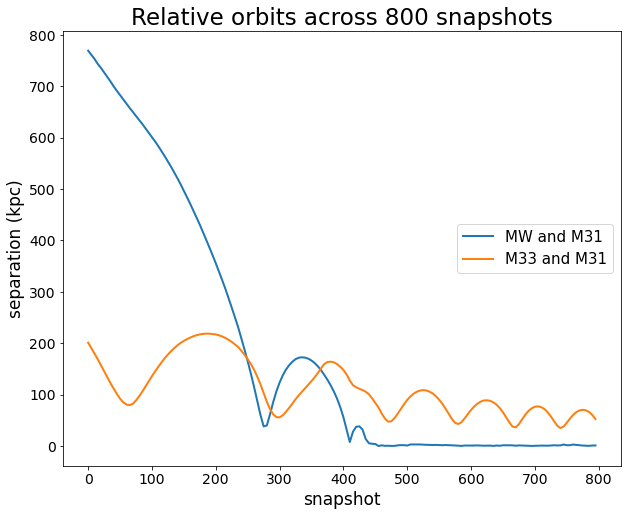

In [84]:
# Plot the Orbit of the galaxies 
#################################

plt.figure(figsize=(10,8))
plt.plot(dataMW[:,0], mag_pos_MW_M31, label='MW and M31', linewidth=2)
plt.plot(dataM31[:,0], mag_pos_M33_M31, label='M33 and M31', linewidth=2)

plt.xlabel('snapshot', fontsize=17) 
plt.ylabel('separation (kpc)', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center right', prop={'size': 15})
plt.title('Relative orbits across 800 snapshots', loc='center', fontsize=23)

plt.show()

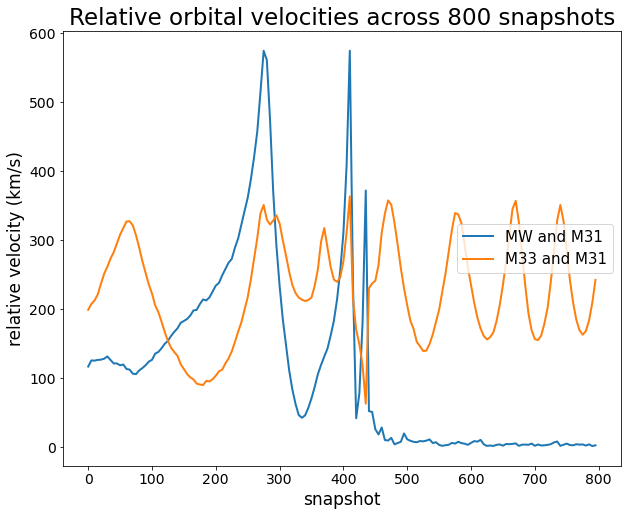

In [85]:
# Plot the orbital velocities of the galaxies 
#################################

plt.figure(figsize=(10,8))
plt.plot(dataMW[:,0], mag_vec_MW_M31, label='MW and M31', linewidth=2)
plt.plot(dataM31[:,0], mag_vec_M33_M31, label='M33 and M31', linewidth=2)

plt.xlabel('snapshot', fontsize=17) 
plt.ylabel('relative velocity (km/s)', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center right', prop={'size': 15})
plt.title('Relative orbital velocities across 800 snapshots', loc='center', fontsize=23)

plt.show()

## Answers to the homework question:

1. The MW and M31 will experience 3 close encounters in the future.

2. The two dips in the separation profile correspond to the two peaks in the relative velocity profile.

3. It appears to me that M31 and the MW will emerge at around snapshot 430. When these galaxies merge, M33's orbit will oscillate.